# Python Analysis
### Install and import the required packages

In [44]:
# If you don't have the packages installed already
!pip install pandas matplotlib seaborn statsmodels

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 36.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.3/233.3 kB 2.9 MB/s eta 0:00:00a 0:00:01


A restart of your kernel (in the toolbar, click Kernel > Restart Kernel) may be necessary!

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats


### Load the data
Once again, check the filepath to ensure it matches your system.

In [33]:
df = pd.read_csv("/workspaces/myfolder/Educate2025_Coffee/global_coffee_productivity.csv")

### We've got our data - now let's dive in!
We saw a histogram of coffee consumption in R, but for fun, let's do a histogram here, as well. We'll do this on sleep hours - oh yeah, and let's add some enhancements like a density curve overlayed and an exported PNG!

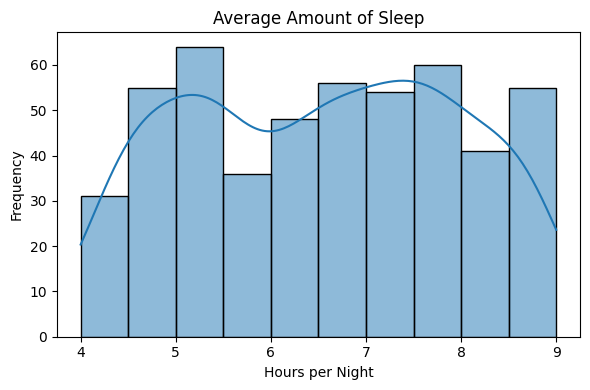

In [34]:
plt.figure(figsize=(6, 4))
sns.histplot(df['Sleep_Hours'], bins=10, kde=True)
plt.title("Average Amount of Sleep")
plt.xlabel("Hours per Night")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("sleep_histogram.png")
plt.show()

For another comparison sake, let's take a look at the syntax and output from Python when we want a correlation matrix! This can be exported as a PNG, as well.

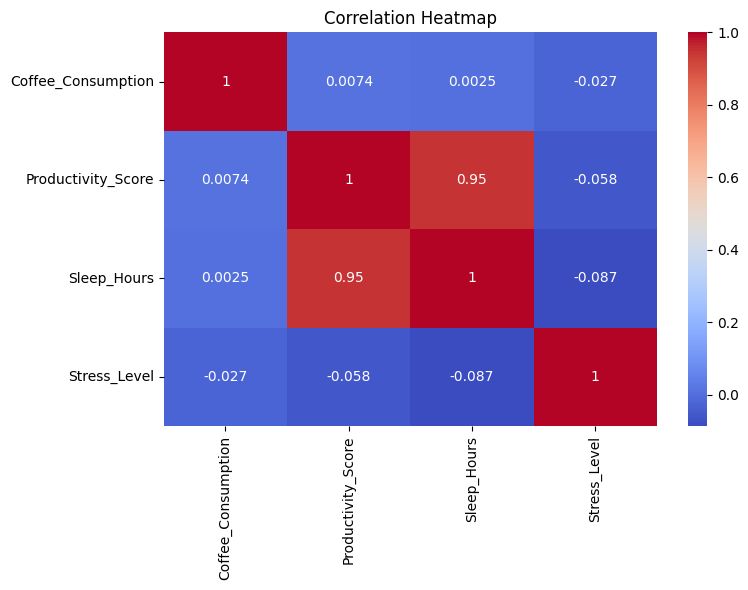

In [35]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Coffee_Consumption', 'Productivity_Score', 'Sleep_Hours', 'Stress_Level']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.savefig("correlation_heatmap.png")
plt.show()

From the correlation matrix, there's not a strong correlation between coffee consumption and productivity; however, many people swear by their coffee driving their ability to work. So, let's try to answer this using using a scatterplot. And since this is kinda a finale, how about we also show a distinction between participants' work from home status.

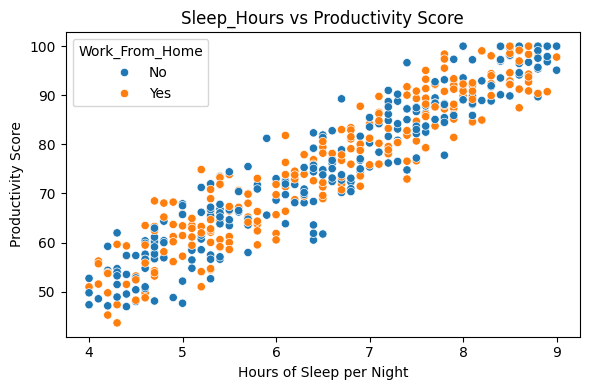

In [36]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='Sleep_Hours', y='Productivity_Score', hue='Work_From_Home')
plt.title("Sleep_Hours vs Productivity Score")
plt.xlabel("Hours of Sleep per Night")
plt.ylabel("Productivity Score")
plt.tight_layout()
plt.savefig("sleep_vs_productivity.png")
plt.show()


### Run a T-Test
**Question**: Do people who work from home have different productivity scores?

In [37]:
from scipy.stats import ttest_ind

# Split the data into two groups based on Work_From_Home status
group_home = df[df['Work_From_Home'] == 'Yes']['Productivity_Score']
group_office = df[df['Work_From_Home'] == 'No']['Productivity_Score']

# Perform independent t-test
t_stat, p_value = ttest_ind(group_home, group_office, equal_var=False)  # Welch's t-test

# Print results
print("T-Test: Productivity by Work From Home Status")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")


T-Test: Productivity by Work From Home Status
T-statistic: -0.0746
P-value: 0.9406


Work From Home Group
Mean: 75.34
Std Dev: 14.35
N: 247
Office Group
Mean: 75.44
Std Dev: 15.14
N: 253
95% CI for mean difference: (-2.69, 2.49)


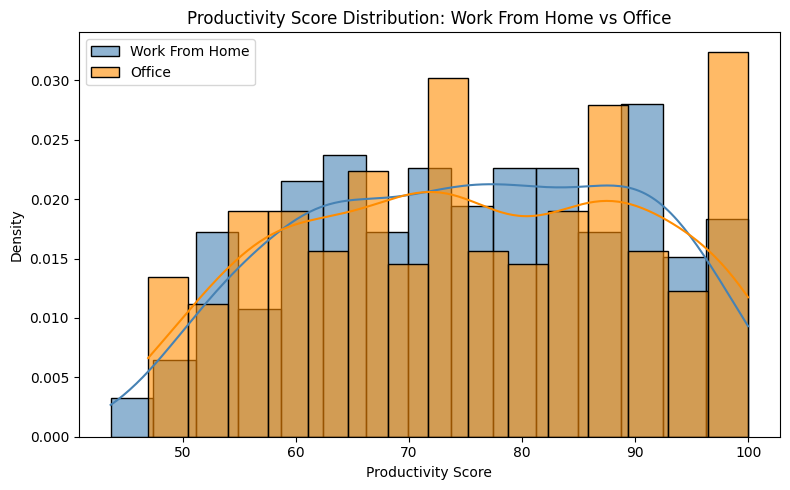

In [47]:
print("Work From Home Group")
print(f"Mean: {group_home.mean():.2f}")
print(f"Std Dev: {group_home.std():.2f}")
print(f"N: {len(group_home)}")

print("Office Group")
print(f"Mean: {group_office.mean():.2f}")
print(f"Std Dev: {group_office.std():.2f}")
print(f"N: {len(group_office)}")

# Difference in means
mean_diff = group_home.mean() - group_office.mean()

# Standard error
se = np.sqrt(group_home.var(ddof=1)/len(group_home) + group_office.var(ddof=1)/len(group_office))

# Degrees of freedom (Welch–Satterthwaite approximation)
dof = (group_home.var(ddof=1)/len(group_home) + group_office.var(ddof=1)/len(group_office))**2 / \
     ((group_home.var(ddof=1)/len(group_home))**2 / (len(group_home)-1) + 
      (group_office.var(ddof=1)/len(group_office))**2 / (len(group_office)-1))

# Confidence interval
ci = stats.t.interval(0.95, dof, loc=mean_diff, scale=se)

print(f"95% CI for mean difference: ({ci[0]:.2f}, {ci[1]:.2f})")

plt.figure(figsize=(8, 5))

# Plot histograms
sns.histplot(group_home, color='steelblue', label='Work From Home', kde=True, stat='density', alpha=0.6, bins=15)
sns.histplot(group_office, color='darkorange', label='Office', kde=True, stat='density', alpha=0.6, bins=15)

# Add labels and legend
plt.title("Productivity Score Distribution: Work From Home vs Office")
plt.xlabel("Productivity Score")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

### ANOVA
**Question**: Does average productivity differ by job role?

In [39]:
from scipy.stats import f_oneway

# Create groups based on Job_Role
group_ds = df[df['Job_Role'] == 'Data Scientist']['Productivity_Score']
group_designer = df[df['Job_Role'] == 'Designer']['Productivity_Score']
group_hr = df[df['Job_Role'] == 'HR Manager']['Productivity_Score']
group_pm = df[df['Job_Role'] == 'Product Manager']['Productivity_Score']
group_sales = df[df['Job_Role'] == 'Sales Executive']['Productivity_Score']
group_se = df[df['Job_Role'] == 'Software Engineer']['Productivity_Score']

# Run one-way ANOVA
f_stat, p_value = f_oneway(group_ds, group_designer, group_hr, group_pm, group_sales, group_se)

# Print results
print("ANOVA: Productivity Score by Job Role")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")

ANOVA: Productivity Score by Job Role
F-statistic: 0.5685
P-value: 0.7242



Group Statistics:
                   count   mean    std
Job_Role                              
Data Scientist        80  76.05  15.40
Designer              92  73.66  14.84
HR Manager            80  76.43  14.45
Product Manager       95  74.55  15.64
Sales Executive       73  76.85  13.48
Software Engineer     80  75.37  14.46
          Multiple Comparison of Means - Tukey HSD, FWER=0.05          
     group1           group2      meandiff p-adj   lower  upper  reject
-----------------------------------------------------------------------
 Data Scientist          Designer  -2.3882 0.8979 -8.8507 4.0743  False
 Data Scientist        HR Manager   0.3842    1.0 -6.2999 7.0684  False
 Data Scientist   Product Manager  -1.4983 0.9853 -7.9132 4.9166  False
 Data Scientist   Sales Executive   0.8065 0.9994  -6.036  7.649  False
 Data Scientist Software Engineer  -0.6812 0.9997 -7.3654 6.0029  False
       Designer        HR Manager   2.7725 0.8233   -3.69  9.235  False
       Designer   Pro

/tmp/ipykernel_5926/1982045028.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Job_Role', y='Productivity_Score', data=df, palette='Set2')


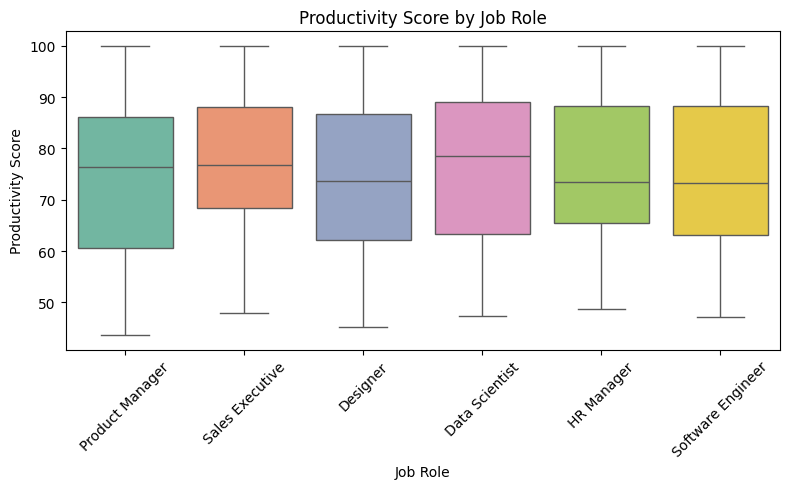

In [45]:
job_stats = df.groupby('Job_Role')['Productivity_Score'].agg(['count', 'mean', 'std']).round(2)
print("\nGroup Statistics:")
print(job_stats)

from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=df['Productivity_Score'],
                          groups=df['Job_Role'],
                          alpha=0.05)
print(tukey)

plt.figure(figsize=(8, 5))
sns.boxplot(x='Job_Role', y='Productivity_Score', data=df, palette='Set2')
plt.xticks(rotation=45)
plt.title("Productivity Score by Job Role")
plt.xlabel("Job Role")
plt.ylabel("Productivity Score")
plt.tight_layout()
plt.show()

### Create clusters

In [40]:
from sklearn.cluster import KMeans
import pandas as pd

# Select the variables for clustering
X = df[['Sleep_Hours', 'Coffee_Consumption', 'Productivity_Score']]

# Run K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# View the clustered data
print(df.head())

       Country         Job_Role Work_From_Home  Coffee_Consumption  \
0    Australia  Product Manager             No            1.866369   
1          USA  Product Manager            Yes            4.982322   
2      Germany  Sales Executive             No            5.476591   
3  South Korea         Designer             No            1.642824   
4  South Korea  Product Manager            Yes            2.919357   

   Productivity_Score  Sleep_Hours  Stress_Level Age_Group  Cluster  
0           99.630888          8.5             2     36-45        1  
1           73.547083          5.4             9     46-60        2  
2           48.007162          4.5             8       60+        0  
3           66.814846          5.4             6     46-60        2  
4           83.746787          7.7            10     26-35        1  


#### Cluster stats

In [41]:
# Mean of each variable by cluster
cluster_means = df.groupby('Cluster')[['Sleep_Hours', 'Coffee_Consumption', 'Productivity_Score']].mean()

# Min of each variable by cluster
cluster_min = df.groupby('Cluster')[['Sleep_Hours', 'Coffee_Consumption', 'Productivity_Score']].min()

# Max of each variable by cluster
cluster_max = df.groupby('Cluster')[['Sleep_Hours', 'Coffee_Consumption', 'Productivity_Score']].max()

# Range (max - min) of each variable by cluster
cluster_range = df.groupby('Cluster')[['Sleep_Hours', 'Coffee_Consumption', 'Productivity_Score']].agg(lambda x: x.max() - x.min())

# Display results
print("Cluster Means:\n", cluster_means)
print("\nCluster Min:\n", cluster_min)
print("\nCluster Max:\n", cluster_max)
print("\nCluster Ranges:\n", cluster_range)

Cluster Means:
          Sleep_Hours  Coffee_Consumption  Productivity_Score
Cluster                                                     
0           4.967284            2.602213           58.102573
1           8.066279            2.602222           91.930699
2           6.479518            2.239765           75.133864

Cluster Min:
          Sleep_Hours  Coffee_Consumption  Productivity_Score
Cluster                                                     
0                4.0                 0.1           43.646040
1                6.7                 0.1           83.702043
2                4.7                 0.1           66.716320

Cluster Max:
          Sleep_Hours  Coffee_Consumption  Productivity_Score
Cluster                                                     
0                6.5            5.861078           66.668311
1                9.0            5.560085          100.000000
2                7.9            5.258931           83.554800

Cluster Ranges:
          Sleep_Hours 

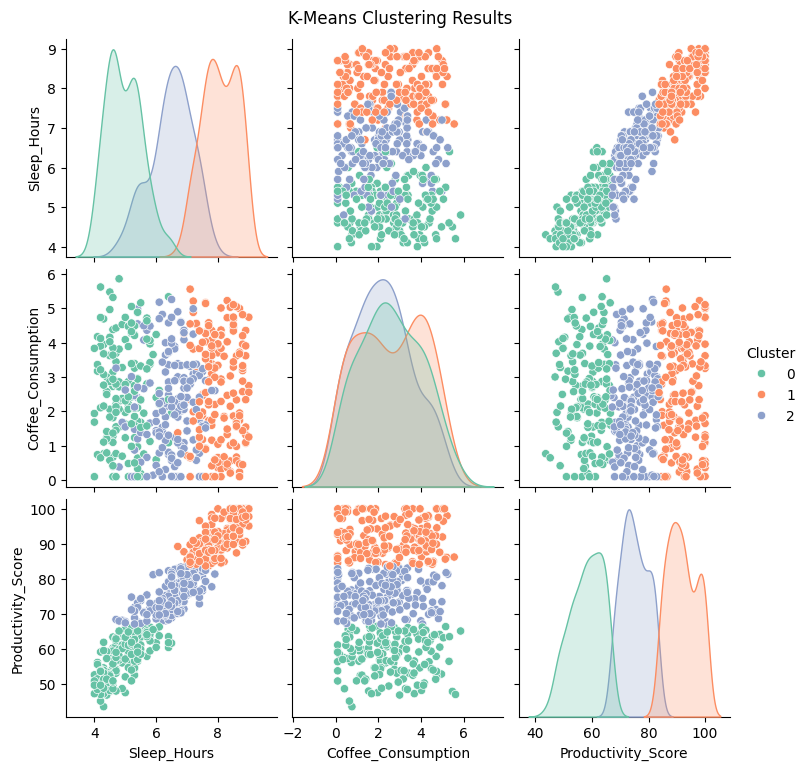

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue='Cluster', vars=['Sleep_Hours', 'Coffee_Consumption', 'Productivity_Score'], palette='Set2')
plt.suptitle("K-Means Clustering Results", y=1.02)
plt.show()